Epoch 1/200


c:\Users\asus1\anaconda3\envs\MOSFET_NN_mini\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0863 - mae: 0.2044 - val_loss: 0.0626 - val_mae: 0.1600
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0314 - mae: 0.1223 - val_loss: 0.0432 - val_mae: 0.1463
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0259 - mae: 0.1218 - val_loss: 0.0399 - val_mae: 0.1331
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0206 - mae: 0.1015 - val_loss: 0.0323 - val_mae: 0.1231
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0173 - mae: 0.0914 - val_loss: 0.0249 - val_mae: 0.1109
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0150 - mae: 0.0825 - val_loss: 0.0183 - val_mae: 0.0898
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 - mae: 0.0691 - val_loss: 0.0177 - val_mae: 0.0866
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - mae: 0.0655 - val_loss: 0.0129 - val_mae: 0.0691
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 - mae: 0.0

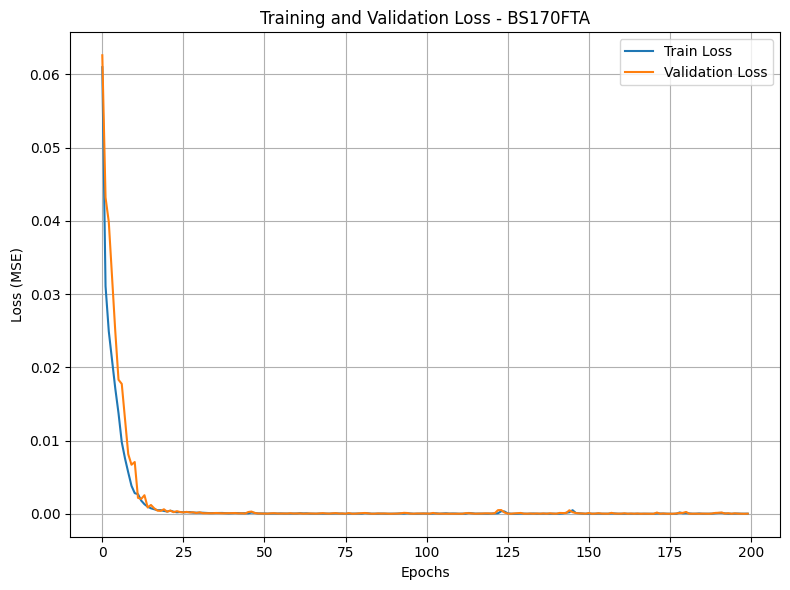

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Ouput 0-3V Gate 0-3V Step 0.2.txt"
data = np.loadtxt(file_path, usecols=(0, 1))  # Use only VDS and ID

# Extract VDS and ID
VDS = data[:, 0]
ID = data[:, 1]

# Generate VGS values from 0V to 3V in 0.2V steps
VGS_values = np.arange(0, 3.2, 0.2)
num_VGS = len(VGS_values)
num_points_per_sweep = len(VDS) // num_VGS

# Reshape and build input-output pairs
VDS_reshaped = VDS[:num_points_per_sweep]
ID_reshaped = ID.reshape(num_VGS, num_points_per_sweep)
X = np.array([[VGS, vds] for VGS in VGS_values for vds in VDS_reshaped])
y = ID  # target

# Normalize features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the neural network
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16,
                    validation_data=(X_test, y_test), verbose=1)

# Save the model
model.save("BS170FTA.keras")
print("✅ Model saved as BS170FTA.keras")

# Evaluate model performance on test data
y_test_pred_scaled = model.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Compute extended performance metrics
mae = mean_absolute_error(y_test_actual, y_test_pred)
mse = mean_squared_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_test_pred)

# Print performance metrics
print("\n📊 Model Performance on Test Set:")
print(f"MAE  = {mae:.6e}")
print(f"MSE  = {mse:.6e}")
print(f"RMSE = {rmse:.6e}")
print(f"R²   = {r2:.6f}")

# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss - BS170FTA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
